<a href="https://colab.research.google.com/github/ahshawaf/AML/blob/project4/Project4_Alshawaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Ahmad Alshawaf
<br>ID: aa726755</br>
Course: Advanced Machine Learning - CSC 685
<br>Project # 4</br>

In this project, the linear regression and non-linear regression will be used to identify which algorithem preforme better and high more accuracy. This will help to see the difference in how to apply them. Also, show the line curve chart for Mean Squared Error to see how the model perform with training and testing set.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from pandas.plotting import scatter_matrix

%matplotlib inline

#Loading Data

I created the fetch method, which is a custom function to fetch the data using read_csv method of panadas library. It takes two arguments data_url, which is the url for the data website, and the data_file, which is the name of the file with the extension.

In [0]:
DATA_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00381/'
DATA_FILE ='PRSA_data_2010.1.1-2014.12.31.csv'

def fetch_data(data_url=DATA_URL,data_file=DATA_FILE):
  df = pd.read_csv(data_url+'/'+data_file)
  return df

In [0]:
df = fetch_data()

#Exploring Data and Preprocessing

In this section, I am going to explor the data. This will help us to identify if there is a missing data and deal with it.

Show the number of records in the data

In [4]:
df_size=len(df)
df_size

43824

Show the top 5 rows of the data

In [5]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


Show the type of each column in the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
No       43824 non-null int64
year     43824 non-null int64
month    43824 non-null int64
day      43824 non-null int64
hour     43824 non-null int64
pm2.5    41757 non-null float64
DEWP     43824 non-null int64
TEMP     43824 non-null float64
PRES     43824 non-null float64
cbwd     43824 non-null object
Iws      43824 non-null float64
Is       43824 non-null int64
Ir       43824 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


##Label Encoding

From the 'df.info()', it shows that the attribute 'cbwd' is not numerical type. So, we have to convert it to numerical. 

Let see how many distict values in the attribute. Then, apply LabelEncoder.

In [7]:
df['cbwd'].value_counts()

SE    15290
NW    14150
cv     9387
NE     4997
Name: cbwd, dtype: int64

In [8]:
encoder = LabelEncoder()
df_cbwd_cat=encoder.fit_transform(df['cbwd'])
df_cbwd_cat

array([1, 1, 1, ..., 1, 1, 1])

Replace the column values with the encoded values

In [0]:
df['cbwd']=df_cbwd_cat

Check the data after the encoding

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
No       43824 non-null int64
year     43824 non-null int64
month    43824 non-null int64
day      43824 non-null int64
hour     43824 non-null int64
pm2.5    41757 non-null float64
DEWP     43824 non-null int64
TEMP     43824 non-null float64
PRES     43824 non-null float64
cbwd     43824 non-null int64
Iws      43824 non-null float64
Is       43824 non-null int64
Ir       43824 non-null int64
dtypes: float64(4), int64(9)
memory usage: 4.3 MB


In [11]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,1,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,1,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,1,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,1,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,1,12.97,0,0


In [12]:
df['cbwd'].value_counts()

2    15290
1    14150
3     9387
0     4997
Name: cbwd, dtype: int64

Show the count of records in each column

In [13]:
df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,1.663267,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,0.937981,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,2.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,2.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,3.000000,585.600000,27.000000,36.000000


In [14]:
len(df)-df['pm2.5'].describe()['count']

2067.0

##Dealing With Missing Data

From the above table, you can see there are 2067 missing records in 'pm2.5' feature. So, this missing data should be treated either by remove the column, or fill it with the average of the column. Because of pm2.5 is the label, using the average is the best way to deal with the missing data.

In [15]:
imp=SimpleImputer(strategy='mean')
imp.fit(df)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [0]:
df_imputed = imp.transform(df)
df_tr=pd.DataFrame(df_imputed,columns=df.columns)

As below, you can see the missing data in 'pm2.5' has the mean value of the column.

In [17]:
df_tr.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1.0,2010.0,1.0,1.0,0.0,98.613215,-21.0,-11.0,1021.0,1.0,1.79,0.0,0.0
1,2.0,2010.0,1.0,1.0,1.0,98.613215,-21.0,-12.0,1020.0,1.0,4.92,0.0,0.0
2,3.0,2010.0,1.0,1.0,2.0,98.613215,-21.0,-11.0,1019.0,1.0,6.71,0.0,0.0
3,4.0,2010.0,1.0,1.0,3.0,98.613215,-21.0,-14.0,1019.0,1.0,9.84,0.0,0.0
4,5.0,2010.0,1.0,1.0,4.0,98.613215,-20.0,-12.0,1018.0,1.0,12.97,0.0,0.0


In the below describe table, it is show that there is no missing data after dealing with it.

In [18]:
df_tr.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,1.663267,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,89.853296,14.433440,12.198613,10.268698,0.937981,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,31.000000,-10.000000,2.000000,1008.000000,1.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,77.000000,2.000000,14.000000,1016.000000,2.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,132.000000,15.000000,23.000000,1025.000000,2.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,3.000000,585.600000,27.000000,36.000000


##Finding Correlation

Part of expoloring data is find the correlation between the attribute 'pm2.5', the label, and the others. 

In [19]:
corr_matrix = df_tr.corr()
corr_matrix['pm2.5'].sort_values(ascending=False)

pm2.5    1.000000
cbwd     0.192408
DEWP     0.167334
day      0.080685
Is       0.019263
year    -0.014354
No      -0.017294
hour    -0.022573
month   -0.023533
PRES    -0.046298
Ir      -0.050224
TEMP    -0.088204
Iws     -0.239969
Name: pm2.5, dtype: float64

From the correlation matrix, it shows that the are high correlation between 'pm2.5' and 'cbwd' and'DEWP'. Also a negative high correlation between 'pm2.5' and 'TEMP' and 'Iws' 

Display the correclotion in charts using scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6380b4f198>,
      dtype=object)

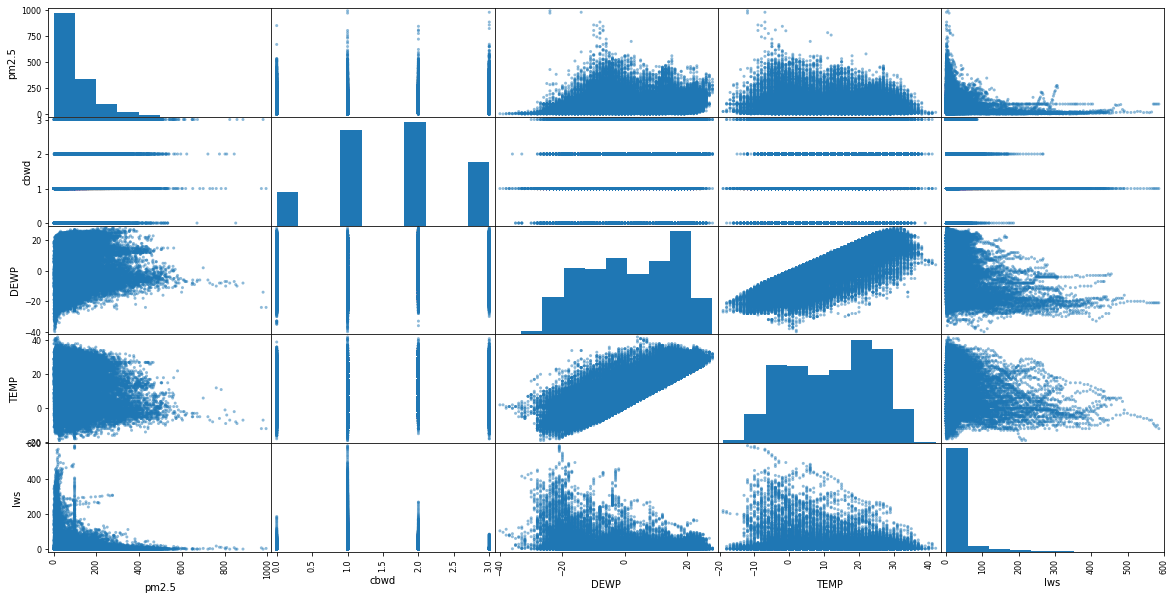

In [20]:
attributes = ['pm2.5','cbwd','DEWP','TEMP','Iws']
scatter_matrix(df_tr[attributes],figsize=(20,10))

Let see closer in the correlation between the 'pm2.5' and 'cbwd','DEWP','TEMP' and 'Iws'

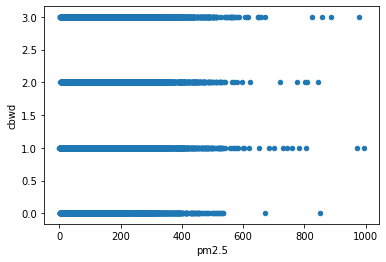

In [21]:
df_tr.plot(kind='scatter',x='pm2.5',y='cbwd')

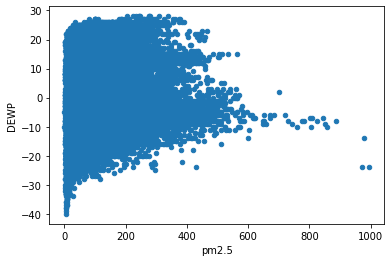

In [22]:
df_tr.plot(kind='scatter',x='pm2.5',y='DEWP')

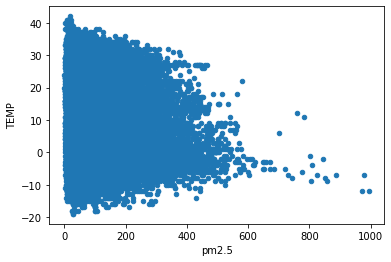

In [23]:
df_tr.plot(kind='scatter',x='pm2.5',y='TEMP')

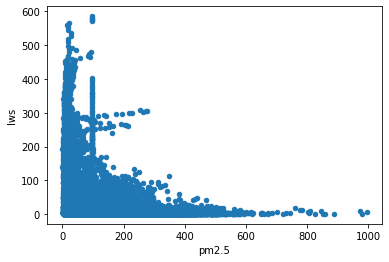

In [24]:
df_tr.plot(kind='scatter',x='pm2.5',y='Iws')

From the above, the most correlation is between 'pm2.5' and 'Iws' 

Now, let generate histogram chart for all numerical attirbutes to check if the data is needed to be scaled.

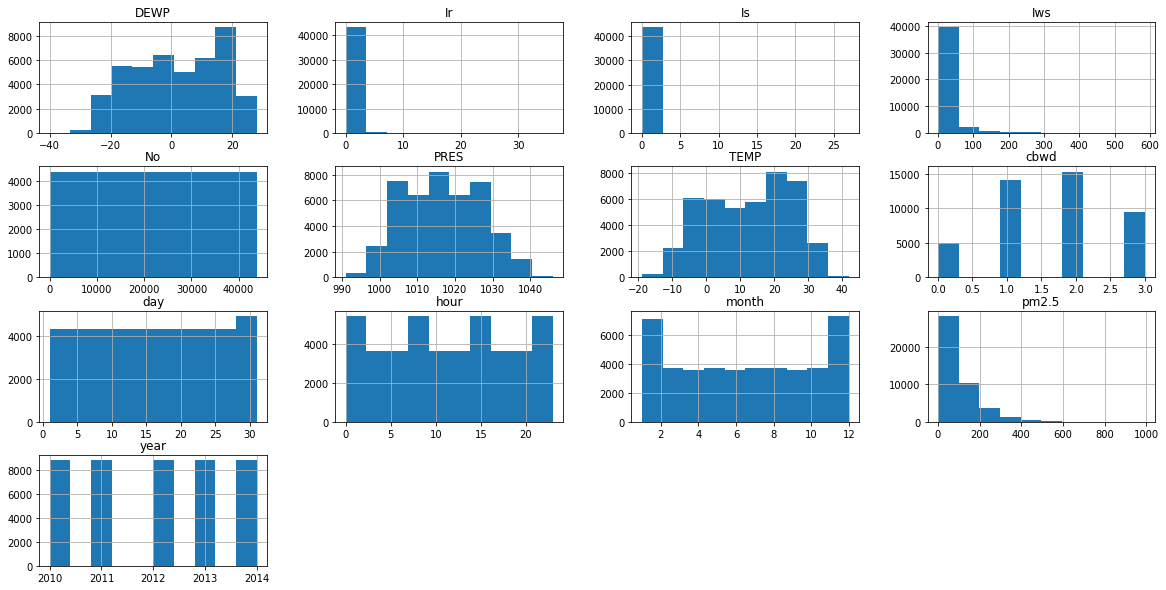

In [25]:
#Generate the historgrams
df_tr.hist(figsize=(20,10))
plt.show()

From the above charts, the data have to be scaled because each feature has different scal, which cuase slow learning and low accuracy. The scaling will be applied after splitting data to training and testing sets

#Split Data to Training and Testing Sets

In this section, the data will be splitted to 70% for training and 30% for testing. But first, the label column, 'pm2.5', need to be spearated from the other attributes.

Now, let spearate the 'pm2.5' column

In [0]:
x_data = df_tr.drop('pm2.5',axis=1)
y_data = df_tr['pm2.5']

Check the data after the spearating

In [27]:
x_data.shape

(43824, 12)

In [28]:
x_data.head()

,No,year,month,day,hour,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1.0,2010.0,1.0,1.0,0.0,-21.0,-11.0,1021.0,1.0,1.79,0.0,0.0
1,2.0,2010.0,1.0,1.0,1.0,-21.0,-12.0,1020.0,1.0,4.92,0.0,0.0
2,3.0,2010.0,1.0,1.0,2.0,-21.0,-11.0,1019.0,1.0,6.71,0.0,0.0
3,4.0,2010.0,1.0,1.0,3.0,-21.0,-14.0,1019.0,1.0,9.84,0.0,0.0
4,5.0,2010.0,1.0,1.0,4.0,-20.0,-12.0,1018.0,1.0,12.97,0.0,0.0


In [29]:
y_data.shape

(43824,)

As it is shown above, we need to reshape y_data from 43824 to 43824x1. This can be done by convert it to nparry type using the method ravel(). Then, the reshape method is used to genarate the data with the new shape.

In [0]:
y_data=y_data.ravel()

In [0]:
y_data=y_data.reshape(y_data.shape[0],1)

In [32]:
y_data.shape

(43824, 1)

Then, let split the data to 70% training and 30% for testing. To do that, the train_test_split is used with passing the argumant x_data, y_data, test_size, which is the percentage of the testing set here is 0.30 for 30%, and random_state. The random_state could be any number. This is used to produce same set of training and testing set in every time the data is splitted

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.30, random_state=56)

check the sets

In [34]:
x_train.shape

(30676, 12)

In [35]:
y_train.shape

(30676, 1)

In [36]:
x_test.shape

(13148, 12)

In [37]:
y_test.shape

(13148, 1)

#Scaling


After spliting data, we can apply a scaling to the data to have faster learning and highier accuracy



In [0]:
scl = StandardScaler()
x_train_scaled=scl.fit_transform(x_train)
x_test_scaled=scl.transform(x_test)

Check the data after scaling

Convert the result to DataFrame and display the 5 top rows. Dealing with DataFrame is more convenience to generate charts.

In [39]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_train_scaled.head()

,No,year,month,day,hour,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1.386985,1.409220,0.133502,-1.105594,-0.508205,1.395263,1.023627,-1.018841,0.359844,0.327099,-0.067134,-0.139818
1,1.447040,1.409220,0.424342,-0.991862,-1.375850,1.187255,0.777288,-0.725939,1.427818,-0.456735,-0.067134,-0.139818
2,0.223795,-0.001080,1.006021,1.510231,-0.363598,0.147218,-0.208067,0.738572,1.427818,-0.439007,-0.067134,-0.139818
3,0.321207,-0.001080,1.587700,0.372916,1.371692,-0.892820,-1.768213,1.422010,-0.708130,-0.349767,-0.067134,-0.139818
4,-0.894709,-0.706231,-1.029856,0.259185,-1.520457,-0.546141,-0.454406,-0.335403,0.359844,-0.349767,-0.067134,-0.139818


In [40]:
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)
x_test_scaled.head()

,No,year,month,day,hour,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,-0.699964,-0.706231,-0.157337,1.510231,-1.665065,1.187255,0.941514,-1.214109,1.427818,-0.456735,-0.067134,-0.139818
1,1.252374,1.409220,-0.739016,1.169037,-1.086635,0.424561,-0.125954,0.250401,-0.708130,-0.216107,-0.067134,4.991498
2,-1.094735,-1.411381,1.587700,-1.560520,-0.652812,-1.100827,-0.454406,-0.140135,-0.708130,0.487053,-0.067134,-0.139818
3,1.186723,1.409220,-1.029856,0.714111,-0.074383,-1.378171,0.695175,0.152767,-0.708130,-0.358731,-0.067134,-0.139818
4,-0.569057,-0.706231,0.715181,-1.105594,-0.942027,0.979248,0.448837,-0.433037,1.427818,-0.403550,-0.067134,-0.139818


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f636885abe0>,
      dtype=object)

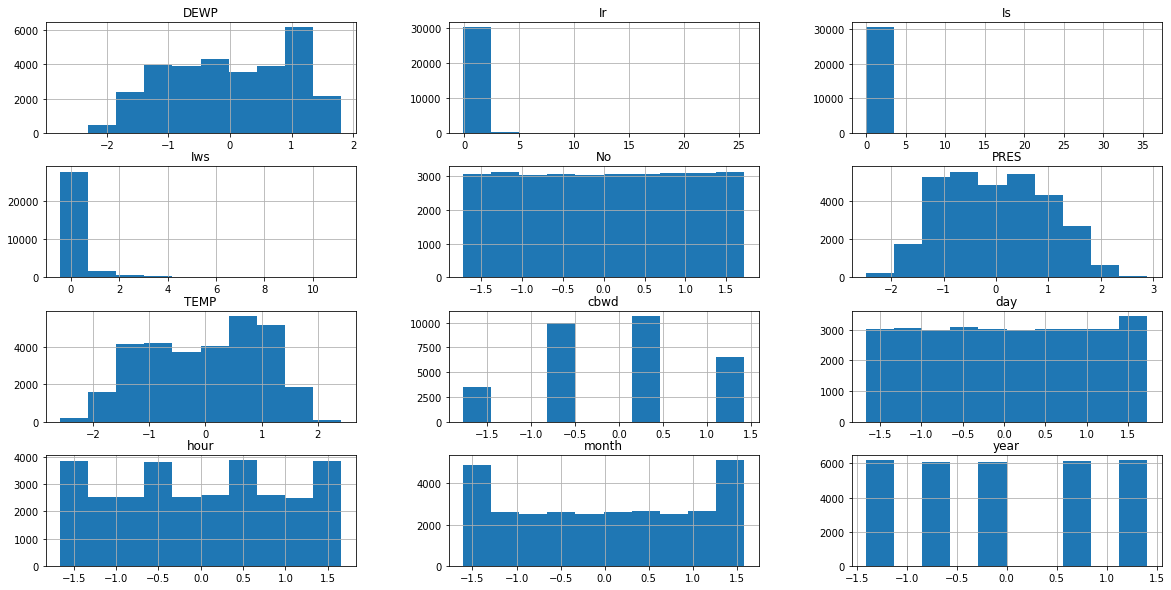

In [41]:
x_train_scaled.hist(figsize=(20,10))

Now as in shown above, the scale for all attributes is the same

#Reduce Dimensionality

In this section, t-SNE is will be used to reduce the dimensionality of x_train and x_test from 12 dimension to one dimension for visulaization purpose.

In [0]:
tsne_mdl=TSNE(n_components=1,random_state=56)
x_train_reduced=tsne_mdl.fit_transform(x_train_scaled,y_train)
x_test_reduced= tsne_mdl.fit_transform(x_test_scaled,y_train)

In [43]:
x_train_reduced.shape

(30676, 1)

In [44]:
x_train_reduced[0]

array([-97.86325], dtype=float32)

#Linear Regression

Now, let build the linear regression model using x_train_scaled,which is normalized, and y_train data


In [98]:
linear_mdl=LinearRegression()
linear_mdl.fit(x_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

After building the linear regression model, it will be tested and see the model accuracy.

In [99]:
linear_prd=linear_mdl.predict(x_test_scaled)
linear_prd

array([[133.17541848],
       [ 77.42828383],
       [ 29.94644557],
       ...,
       [ 73.26760011],
       [122.68649183],
       [  3.89126388]])

In [100]:
linear_score=linear_mdl.score(x_test_scaled,y_test)
linear_score

0.25748586850527244

The accuracy of the model is 25% which is very low. That mean the linear regression dose not fit for the data.

Let see the error value of mean squared error function.

In [48]:
mean_squared_error(y_test,linear_prd)

6083.26189645167

The error value is 6083, which is too high.

The below chart shows the actual values vs the predicted values. As it is shown, most of the predicted value are fitting in the specific part and not cover all cases.

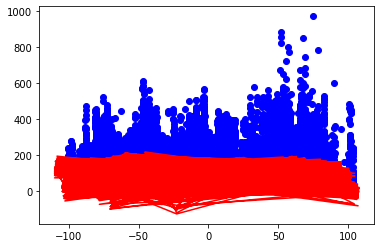

In [49]:
plt.scatter(x_train_reduced,y_train,color='blue')
plt.plot(x_test_reduced,linear_prd,color='red')

Let see the intercept and the coefficient of the linear regression model.

In [50]:
linear_mdl.intercept_,linear_mdl.coef_

(array([98.37306224]),
 array([[ 2.88302322e+03, -2.82451894e+03, -5.75839675e+02,
         -4.16898391e+01,  7.79049608e+00,  6.30486438e+01,
         -7.34337560e+01, -1.43607541e+01,  9.95539917e+00,
         -9.96986608e+00, -2.12716015e+00, -9.46009335e+00]]))

Stochastic Gradient Descent can be use to get the proper intercept and coefficient for the data.

In [51]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=1000,tol=0.003,eta0=0.1,random_state=56)
sgd_reg.fit(x_train_scaled,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=56,
             shuffle=True, tol=0.003, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [52]:
sgd_reg.intercept_,sgd_reg.coef_

(array([104.41666874]),
 array([  5.61008675,  -1.37022407,  -4.40301301,  10.26727283,
         12.41251379,  66.24790862, -77.98539112,  -9.06936114,
         -0.38328376, -15.75733646,  -7.44625422, -14.70631024]))

As it is shown above, there is a difference between the linear regression intercept and coefficient than the stochastic gradient descent intercept and coefficient. So, the linear regression does not fit the data. For that let use the non-linear regression.
Let evaluate the linear regression using k-fold to make sure of the accuracy. K-fold generates random index to cover all cases as their ration in the data.


##Evaluate Using k-fold

Using KFold with number of splits is 5, which is the default.

In [53]:
kfold=KFold(n_splits=5,random_state=56)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [0]:
x_train_scaled=x_train_scaled.to_numpy()
x_test_scaled=x_test_scaled.to_numpy()

In [55]:
x_train_scaled.shape

(30676, 12)

In [56]:
x_test_scaled.shape

(13148, 12)

Now, let generate data using the k-fold generated indexes.

In [0]:
for train_index,test_index in kfold.split(x_train_scaled):
  x_train_kfold=x_train_scaled[train_index]
  y_train_kfold = y_train[train_index]
  x_test_kfold=x_train_scaled[test_index]
  y_test_kfold = y_train[test_index]

Check the output.

In [58]:
x_train_kfold.shape

(24541, 12)

In [59]:
y_train_kfold.shape

(24541, 1)

In [60]:
x_test_kfold.shape

(6135, 12)

In [61]:
y_test_kfold.shape

(6135, 1)

Evaluate using k-fold


Now, use the test set to test the linear regression model.

In [62]:
linear_prd_kfold=linear_mdl.predict(x_test_kfold)
linear_prd_kfold

array([[ 93.00562267],
       [ 97.87437615],
       [104.54418387],
       ...,
       [109.06748734],
       [142.78174022],
       [116.73714871]])

In [104]:
linear_score_kfold=linear_mdl.score(x_test_kfold,y_test_kfold)
linear_score_kfold

0.2510642577448706

The accuracy, as in the above, is 25%, which is still low. For that, Linear regression does not fit the data and non-linear regression would be better.

Let, generate a chart to show the relation between the mean squared error of the training data and testing data.

In [0]:
def plot_learning_curves(model,x,y):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
  train_errors, test_errors = [], []
  for m in range(1,len(x_train)):
    model.fit(x_train[:m],y_train[:m])
    y_train_prd = model.predict(x_train[:m])
    y_test_prd = model.predict(x_test)
    train_errors.append(mean_squared_error(y_train_prd,y_train[:m]))
    test_errors.append(mean_squared_error(y_test_prd,y_test))
  plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='train')
  plt.plot(np.sqrt(test_errors),'b-',linewidth=3,label='test')
  plt.legend(loc='best')


In [0]:
linear_mdl = LinearRegression()

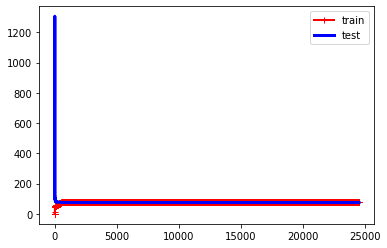

In [121]:
plot_learning_curves(linear_mdl,x_train_scaled,y_train)

From the chart above, the model at beginning starts at Zero for the training model. Then, the error increased while the training data size increasing until it reached value that cannot handle or fit the data and stay on this value even with more data. While, the model for testing data, start with high error value which means the model did not learn will from the data. As the size of testing data increases, the error value decrease. Until it reaches a point that could not be improved even with increasing in data size.

#Non-linear Regression

##Build Non-linear Regression

In this section, Polynomial Features is used to generate non-linear regression. The polynomial features will be used to generate data with 6th degree. Then, provide the result to the linear regression. 

In [0]:
poly_mdl=PolynomialFeatures(degree=6, include_bias=False)
x_poly=poly_mdl.fit_transform(x_train_scaled)

In [108]:
x_poly.shape

(30676, 18563)

In [157]:
Nonlinear_mdl = LinearRegression()
Nonlinear_mdl.fit(x_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [158]:
Nonlinear_mdl.intercept_,Nonlinear_mdl.coef_

(array([102526.97714506]),
 array([[1.09405502e+04, 1.73770589e+07, 7.90834802e+04, ...,
         5.42776156e+02, 3.83288807e+05, 6.96584965e+00]]))

Now, transform the data to be used to testing to be in the same degree and shape of the model.

In [0]:
x_train_scaled_poly=poly_mdl.transform(x_train_scaled)

Then, predict and generate the accuracy of the model.

In [160]:
Nonlinear_prd=Nonlinear_mdl.predict(x_train_scaled_poly)
Nonlinear_prd

array([[192.25534895],
       [ 61.30124355],
       [ 56.44064979],
       ...,
       [128.43707333],
       [ 52.27333332],
       [161.35710341]])

In [162]:
Nonlinear_score=Nonlinear_mdl.score(x_train_scaled_poly,y_train)
Nonlinear_score

0.8088363198248798

So, the accuracy of the non-linear model is 80% which is much better than the linear regression.

Using the mean squared error, the error value of the non-linear model is 1533, which is better than the linear regression.

In [115]:
mean_squared_error(y_train,linear_prd)

1533.530348995897

##Evaluate using k-fold

In [116]:
poly_prd_kfold=linear_mdl.predict(x_train_scaled_poly)
poly_prd_kfold

array([[192.25534895],
       [ 61.30124355],
       [ 56.44064979],
       ...,
       [128.43707333],
       [ 52.27333332],
       [161.35710341]])

In [117]:
linear_mdl.score(x_train_scaled_poly,y_train)

0.8088363198248798

The accuracy of the non-linear regression is 80% with k-fold data

##Learning Curve

Generating learning curves for the non-linear regression toke long time. It kept running for almost more than 10 hours. So, the data is used with size 1000.

In [0]:
poly_mdl=Pipeline((
    ('poly_features',PolynomialFeatures(degree=6,include_bias=False)),
    ('sgd_reg',LinearRegression())
))

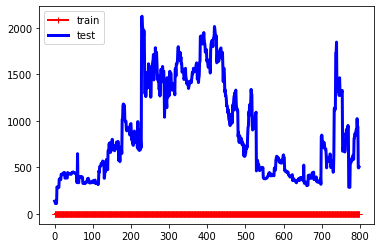

In [122]:
 plot_learning_curves(poly_mdl,x_train_scaled[:1000],y_train[:1000])   

the chart above, shows that the model with training data has low error value with what ever of the data size, but with the testing data the error is zero at the begning. then start flaqtuating from high to low as the data size increasing. Also, the overfitting could be figured out from the chart as the traing data has a low error value but the testing data has a high error value.

#Conclusion

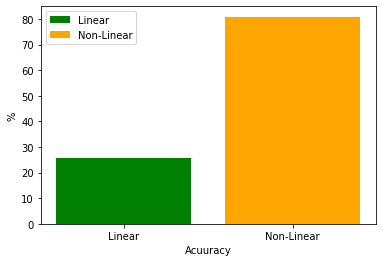

In [131]:
plt.bar('Linear',height=linear_score*100,label='Linear',color='green')
plt.bar('Non-Linear',height=Nonlinear_score*100,label='Non-Linear',color='orange')
plt.xlabel('Acuuracy')
plt.ylabel('%')
plt.legend()
plt.show()

With this data set, the linear regression could not fit the data and has 40% accuracy. On the other hand, the non-linear regression has 80% accuracy, which is almost double the accuracy of the linear regression.

#Issued I faced

-An error always displayed after a while when I chose the degree more than 6 for the polynomial feature. The message said there is no enough memory to allocate a memory.

-Generating learning curves for the non-linear regression toke long time. It kept running for almost more than 10 hours. So, the data is used with size 1000.

https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data#

https://sju.instructure.com/courses/20477/files/1963041?module_item_id=678434

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

https://scikit-learn.org/stable/modules/impute.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

https://riptutorial.com/scikit-learn/example/27963/k-fold-cross-validation